# Simulacro de examen M2

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
import plotly.express as px

In [2]:
pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",100)
%matplotlib inline

In [3]:
import sys
sys.path.insert(1, '../../usr_lib/')
import utilities

In [4]:
df = pd.read_csv('../../data/modulo2/examen/churn-bigml-80 - churn-bigml-80.csv', sep=',', encoding='utf8')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [6]:
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [8]:
vars_c = ['Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge',  'Customer service calls']
vars_v = ['Account length', 'International plan', 'Voice mail plan']
vars_g = ['State', 'Area code']

In [9]:

df = utilities.rename_variables(df, vars_c, 'c_')
df = utilities.rename_variables(df, vars_v, 'v_')
df = utilities.rename_variables(df, vars_g, 'g_')

In [10]:
df.head(5)

,g_state,v_account length,g_area code,v_international plan,v_voice mail plan,c_number vmail messages,c_total day minutes,c_total day calls,c_total day charge,c_total eve minutes,c_total eve calls,c_total eve charge,c_total night minutes,c_total night calls,c_total night charge,c_total intl minutes,c_total intl calls,c_total intl charge,c_customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


<AxesSubplot:>

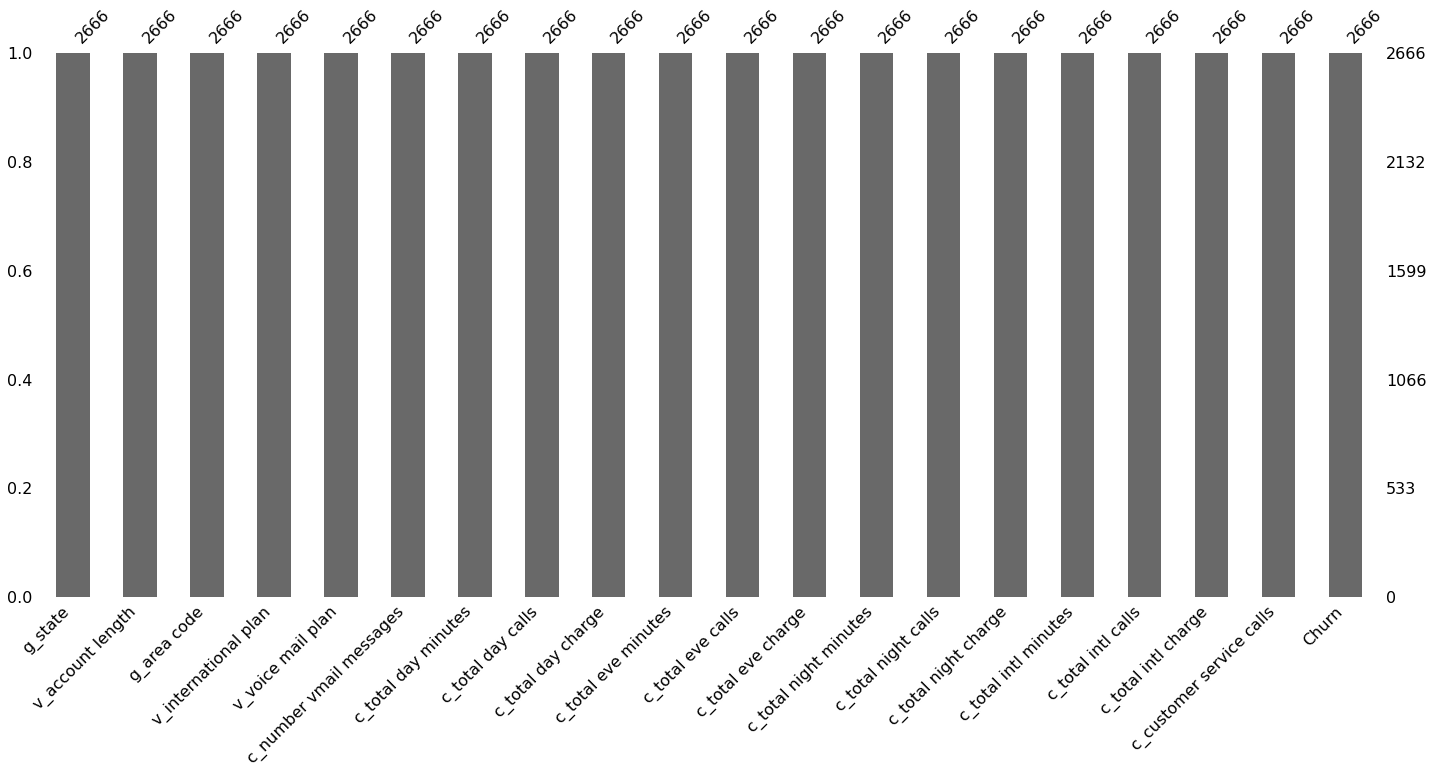

In [16]:
msno.bar(df)

In [28]:
df[list(df.filter(like='c_'))].describe(percentiles = [i/10 for i in range(1, 11)])

,c_number vmail messages,c_total day minutes,c_total day calls,c_total day charge,c_total eve minutes,c_total eve calls,c_total eve charge,c_total night minutes,c_total night calls,c_total night charge,c_total intl minutes,c_total intl calls,c_total intl charge,c_customer service calls
count,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,110.40000,74.500000,18.770000,135.950000,74.000000,11.555000,136.550000,75.000000,6.145000,6.700000,2.000000,1.810000,0.000000
20%,0.000000,134.30000,84.000000,22.830000,157.000000,83.000000,13.350000,158.700000,83.000000,7.140000,8.000000,3.000000,2.160000,0.000000
30%,0.000000,150.60000,90.000000,25.600000,171.600000,89.000000,14.585000,174.000000,90.000000,7.830000,8.900000,3.000000,2.400000,1.000000
40%,0.000000,165.80000,96.000000,28.190000,187.100000,95.000000,15.900000,188.200000,95.000000,8.470000,9.600000,3.000000,2.590000,1.000000
50%,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
60%,0.000000,194.30000,106.000000,33.030000,213.100000,105.000000,18.110000,214.200000,105.000000,9.640000,11.000000,5.000000,2.970000,2.000000


In [41]:
df[list(df.filter(like='c_'))].describe()

,c_number vmail messages,c_total day minutes,c_total day calls,c_total day charge,c_total eve minutes,c_total eve calls,c_total eve charge,c_total night minutes,c_total night calls,c_total night charge,c_total intl minutes,c_total intl calls,c_total intl charge,c_customer service calls
count,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [39]:
np.arange(1, 11)/10

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [31]:
corr = df[list(df.filter(like= 'c_'))].corr()

In [32]:
corr

,c_number vmail messages,c_total day minutes,c_total day calls,c_total day charge,c_total eve minutes,c_total eve calls,c_total eve charge,c_total night minutes,c_total night calls,c_total night charge,c_total intl minutes,c_total intl calls,c_total intl charge,c_customer service calls
c_number vmail messages,1.000000,0.019027,-0.009622,0.019027,0.011401,0.005131,0.011418,-0.000224,0.008124,-0.000229,-0.004156,0.027013,-0.004136,-0.018787
c_total day minutes,0.019027,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934,-0.024543
c_total day calls,-0.009622,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133,-0.011945
c_total day charge,0.019027,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938,-0.024548
c_total eve minutes,0.011401,0.003999,-0.026003,0.004008,1.000000,-0.007654,1.000000,-0.013414,0.009017,-0.013450,-0.006915,0.002160,-0.006947,-0.013192
c_total eve calls,0.005131,0.009059,0.006473,0.009056,-0.007654,1.000000,-0.007642,-0.000175,0.000797,-0.000135,0.011012,0.003710,0.011000,0.001058
c_total eve charge,0.011418,0.003992,-0.026006,0.004002,1.000000,-0.007642,1.000000,-0.013428,0.009030,-0.013464,-0.006923,0.002169,-0.006955,-0.013196
c_total night minutes,-0.000224,0.013491,0.008986,0.013495,-0.013414,-0.000175,-0.013428,1.000000,0.012736,0.999999,-0.008607,-0.001110,-0.008510,0.005236
c_total night calls,0.008124,0.015054,-0.016776,0.015057,0.009017,0.000797,0.009030,0.012736,1.000000,0.012720,-0.023447,0.019367,-0.023434,-0.005677
c_total night charge,-0.000229,0.013464,0.008972,0.013468,-0.013450,-0.000135,-0.013464,0.999999,0.012720,1.000000,-0.008615,-0.001099,-0.008517,0.005257
